# docTR Example

In [1]:
from doctr.io import DocumentFile
from doctr.models import kie_predictor
import torch

# Comment to use only CPU
device = torch.device("cuda:0")


c:\Users\Jolmoz\.conda\envs\tr_ocr\lib\site-packages\weasyprint\text\fonts.py:62: UserWarning: FontConfig cannot load default config file. Expect ugly output.
  warn('FontConfig cannot load default config file. Expect ugly output.')


## Optional to see interactive plots

In [2]:
%matplotlib widget

## Prediction

In [3]:

# Model
# You can test other models https://mindee.github.io/doctr/using_doctr/using_models.html
# Replace the next line with this to use only CPU -> model = kie_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
model = kie_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True).to(device)

# PDF
# doc = DocumentFile.from_pdf("documents/1.pdf")

# IMAGE
doc = DocumentFile.from_images("documents/2.png")

# Analyze
result = model(doc)

predictions = result.pages[0].predictions
for class_name in predictions.keys():
    list_predictions = predictions[class_name]
    for prediction in list_predictions:
        print(f"Prediction for {class_name}: {prediction}")

Prediction for words: Prediction(value='castrilon.academy', confidence=0.54, bounding_box=((0.099609375, 0.06350111823017407), (0.3125, 0.11926529255319152)))
Prediction for words: Prediction(value='Domain', confidence=0.84, bounding_box=((0.3251953125, 0.261560082205029), (0.3837890625, 0.29040362064796904)))
Prediction for words: Prediction(value='Transfer', confidence=1.0, bounding_box=((0.6669921875, 0.26348298476789167), (0.728515625, 0.2865578155222437)))
Prediction for words: Prediction(value='Products', confidence=1.0, bounding_box=((0.4677734375, 0.261560082205029), (0.53515625, 0.29040362064796904)))
Prediction for words: Prediction(value='Advanced', confidence=0.99, bounding_box=((0.765625, 0.26348298476789167), (0.8369140625, 0.2865578155222437)))
Prediction for words: Prediction(value='&', confidence=1.0, bounding_box=((0.650390625, 0.25771427707930367), (0.6640625, 0.29040362064796904)))
Prediction for words: Prediction(value='DNS', confidence=1.0, bounding_box=((0.841796

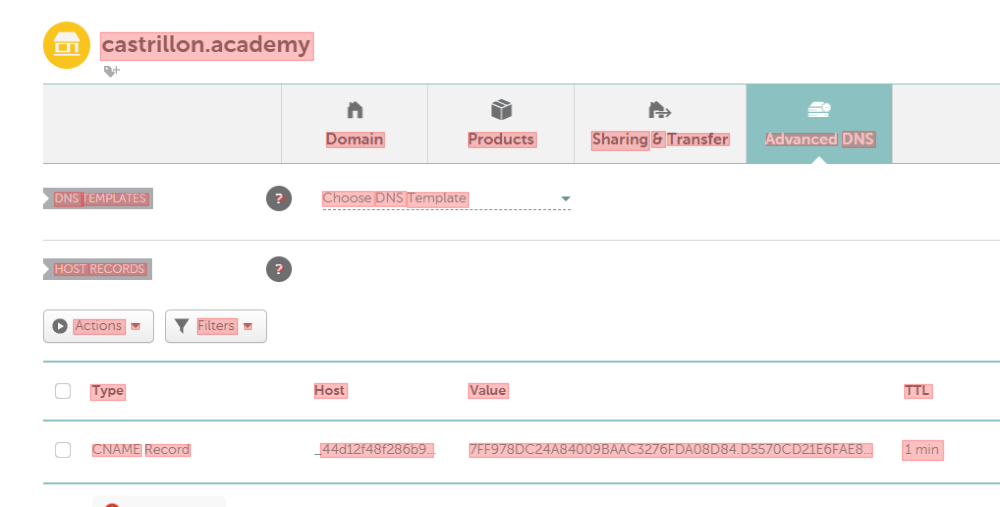

In [4]:
result.show()

In [8]:
import os
# Ruta de la carpeta
carpeta_out = "out"

# Verificar si la carpeta existe
if not os.path.exists(carpeta_out):
    # Si no existe, crear la carpeta
    os.makedirs(carpeta_out)

In [9]:
xml_output = result.export_as_xml()
with open("out/hocr.html", "wb") as archivo:
    # Escribir HOCR en un archivo
    archivo.write(xml_output[0][0])

In [10]:
import json

json_output = result.export()
with open("out/hocr.json", "w") as archivo:
    # Escribir JSON en un archivo
    archivo.write(json.dumps(json_output))